# 1. Importing Packages & Defining Const Variables

In [544]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import linalg as LA

from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

%matplotlib inline

In [545]:
PROJECT_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
DATA_DIR = os.path.join(PROJECT_DIR, 'data', 'processed')

# 2. Data Preprocessing

## 2.1 Loading Dataset

In [546]:
df = pd.read_csv(os.path.join(DATA_DIR, 'resale-flat-prices-2017.csv'))  

In [547]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,crawled,lat,long
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10 Singapore,True,1.362005,103.853880
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4 Singapore,True,1.370966,103.838202
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5 Singapore,True,1.380709,103.835368
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10 Singapore,True,1.366201,103.857201
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5 Singapore,True,1.381041,103.835132


## 2.1 Convert remaining lease

In [548]:
def convert_remaining_lease(lease):
    splitted = lease.split(" ")
    
    year = int(splitted[0])
    month = int(splitted[2]) if len(splitted) > 2 else 0

    return year * 12 + month

df['remaining_lease_in_months'] = df['remaining_lease'].apply(convert_remaining_lease)

In [549]:
# Inspect conversion
df[['remaining_lease', 'remaining_lease_in_months']].head()

,remaining_lease,remaining_lease_in_months
0,61 years 04 months,736
1,60 years 07 months,727
2,62 years 05 months,749
3,62 years 01 month,745
4,62 years 05 months,749


## 2.2 Drop Redundant Columns

In [550]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'full_address', 'crawled', 'lat',
       'long', 'remaining_lease_in_months'],
      dtype='object')

In [551]:
df_truncated = df.drop(["month", "street_name", "block", "full_address", "crawled", "remaining_lease", "lat","long"],axis=1)
df_truncated.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_in_months
0,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,1979,232000.0,736
1,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1978,250000.0,727
2,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1980,262000.0,749
3,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,1980,265000.0,745
4,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1980,265000.0,749


In [552]:
df_truncated.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_in_months
0,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,1979,232000.0,736
1,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1978,250000.0,727
2,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1980,262000.0,749
3,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,1980,265000.0,745
4,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1980,265000.0,749


## 2.3 Examine Features' Correlation

<AxesSubplot:>

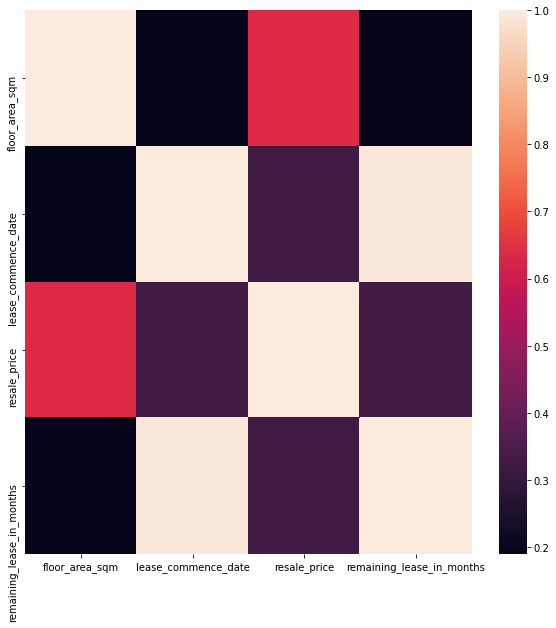

In [553]:
plt.subplots(figsize=(10,10))
sns.heatmap(df_truncated.corr())

### Remove either "lease_commence_date" or "remaining_lease_in_months"

In [554]:
df_truncated = df_truncated.drop(["lease_commence_date"],axis=1)
df_truncated.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,remaining_lease_in_months
0,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,232000.0,736
1,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,250000.0,727
2,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,262000.0,749
3,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,265000.0,745
4,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,265000.0,749


## 2.4 Feature Encoding (Categorical Encoding)

### 2.4.1 One-Hot Encoding (Nominal Variables)

In [555]:
df_encoded = pd.get_dummies(df_truncated, columns=['town', 'flat_model'])
df_encoded.head()

,flat_type,storey_range,floor_area_sqm,resale_price,remaining_lease_in_months,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,...,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,2 ROOM,10 TO 12,44.0,232000.0,736,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3 ROOM,01 TO 03,67.0,250000.0,727,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3 ROOM,01 TO 03,67.0,262000.0,749,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3 ROOM,04 TO 06,68.0,265000.0,745,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,3 ROOM,01 TO 03,67.0,265000.0,749,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### 2.4.2 Ordinal Encoding (Ordinal Variables) - Flat Type

In [556]:
df_encoded.groupby('flat_type')['floor_area_sqm'].describe()

,count,mean,std,min,25%,50%,75%,max
flat_type,,,,,,,,
1 ROOM,37.0,31.000000,0.000000,31.0,31.0,31.0,31.0,31.0
2 ROOM,1203.0,45.931006,2.812096,34.0,45.0,46.0,47.0,60.0
3 ROOM,18867.0,68.232316,6.530574,51.0,65.0,67.0,72.0,249.0
4 ROOM,32233.0,95.432017,7.256382,70.0,91.0,93.0,103.0,138.0
5 ROOM,19306.0,118.134052,7.414571,99.0,111.0,119.0,122.0,160.0
EXECUTIVE,6214.0,144.390409,10.600912,124.0,141.0,146.0,148.0,215.0
MULTI-GENERATION,35.0,164.971429,10.095094,132.0,164.0,165.0,170.0,179.0


In [557]:
df_encoded = df_encoded.drop(['flat_type'], axis=1)
df_encoded.head()

,storey_range,floor_area_sqm,resale_price,remaining_lease_in_months,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,...,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,10 TO 12,44.0,232000.0,736,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01 TO 03,67.0,250000.0,727,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,01 TO 03,67.0,262000.0,749,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,04 TO 06,68.0,265000.0,745,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,01 TO 03,67.0,265000.0,749,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [558]:
# lease_df = df_encoded[df_encoded['flat_type'] != '1 ROOM'].groupby(['remaining_lease_in_months'])
# lease_count = [(k, v) for k, v in lease_df['flat_type'].unique().apply(len).items()]
# lease_count.sort(key=lambda x: x[1], reverse=True)

# lease_count = np.array(lease_count)
# lease_count[:15]

In [559]:
# lease_months = lease_count[:12,0]
# print(lease_months)

In [560]:
# lease_count = [(k, v) for k, v in lease_df['flat_type'].unique().apply(len).items()]

In [561]:
# lease_df = df_encoded[(df_encoded['flat_type'] != '1 ROOM') & (df_encoded['remaining_lease_in_months']).isin(lease_months)].groupby(['remaining_lease_in_months'])
# lease_df['month_computed'].describe()

In [562]:
# df_encoded.groupby(['flat_type'])['resale_price'].describe()

### 2.4.3 Ordinal Encoding (Ordinal Variable) - Storey Range

In [563]:
sorted(df_encoded['storey_range'].unique())

['01 TO 03',
 '04 TO 06',
 '07 TO 09',
 '10 TO 12',
 '13 TO 15',
 '16 TO 18',
 '19 TO 21',
 '22 TO 24',
 '25 TO 27',
 '28 TO 30',
 '31 TO 33',
 '34 TO 36',
 '37 TO 39',
 '40 TO 42',
 '43 TO 45',
 '46 TO 48',
 '49 TO 51']

In [564]:
storey_encodings = [
    ['01 TO 03'], ['04 TO 06'], ['07 TO 09'],
    ['10 TO 12'], ['13 TO 15'], ['16 TO 18'],
    ['19 TO 21'], ['22 TO 24'], ['25 TO 27'],
    ['28 TO 30'], ['31 TO 33'], ['34 TO 36'],
    ['37 TO 39'], ['40 TO 42'], ['43 TO 45'],
    ['46 TO 48'], ['49 TO 51']
]
enc = OrdinalEncoder()
enc.fit(storey_encodings)

OrdinalEncoder()

In [565]:
enc.transform(df_encoded[['storey_range']])

array([[3.],
       [0.],
       [0.],
       ...,
       [2.],
       [1.],
       [0.]])

In [566]:
enc.transform(df_encoded[['storey_range']])[:5]

array([[3.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [567]:
df_encoded[['storey_range']].head()

,storey_range
0,10 TO 12
1,01 TO 03
2,01 TO 03
3,04 TO 06
4,01 TO 03


In [568]:
df_encoded['storey_range'] = enc.transform(df_encoded[['storey_range']]).squeeze().astype(int)
df_encoded

,storey_range,floor_area_sqm,resale_price,remaining_lease_in_months,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,...,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,3,44.0,232000.0,736,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,67.0,250000.0,727,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,67.0,262000.0,749,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,68.0,265000.0,745,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,67.0,265000.0,749,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77890,1,146.0,598000.0,795,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77891,0,142.0,510000.0,793,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77892,2,142.0,555000.0,779,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77893,1,145.0,639888.0,796,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2.5 Feature Transformation & Scaling

### 2.5.1 Standard Transformation

In [569]:
df_encoded.head()

,storey_range,floor_area_sqm,resale_price,remaining_lease_in_months,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,...,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,3,44.0,232000.0,736,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,67.0,250000.0,727,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,67.0,262000.0,749,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,68.0,265000.0,745,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,67.0,265000.0,749,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


array([[<AxesSubplot:title={'center':'floor_area_sqm'}>,
        <AxesSubplot:title={'center':'remaining_lease_in_months'}>]],
      dtype=object)

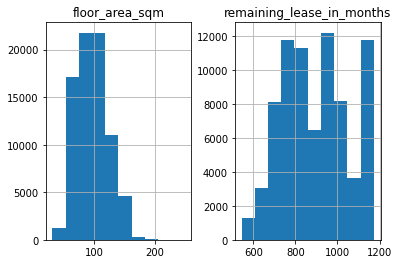

In [570]:
df_encoded[['floor_area_sqm', 'remaining_lease_in_months']].hist()

Although "floor_area_sqm" seems to be a little right skewed, it is generally a normal distribution and seems fine to leave it this way

### 2.5.2 StandardScaler - Normalizing Data

In [571]:
scaler = StandardScaler()
df_encoded[['floor_area_sqm', 'remaining_lease_in_months']] = scaler.fit_transform(df_encoded[['floor_area_sqm', 'remaining_lease_in_months']])
df_encoded.head()

,storey_range,floor_area_sqm,resale_price,remaining_lease_in_months,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,...,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,3,-2.206723,232000.0,-1.046010,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,-1.260026,250000.0,-1.104785,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,-1.260026,262000.0,-0.961112,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,-1.218865,265000.0,-0.987235,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,-1.260026,265000.0,-0.961112,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# 3. Data Splitting

### 3.1. Split into Features (X) and Targets (y)

In [572]:
def split_dataset(X, y, validation_size=0.2, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True)
    X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=(0.2/(1-test_size)), shuffle=True)
    
    return X_train, X_validate, X_test, y_train, y_validate, y_test

In [573]:
X = df_encoded[['floor_area_sqm', 'remaining_lease_in_months']]
y = df_encoded['resale_price']

In [574]:
X_train, X_validate, X_test, y_train, y_validate, y_test = split_dataset(X, y)

print(f"Train: {len(X_train)}")
print(f"Validate: {len(X_validate)}")
print(f"Test: {len(X_test)}")

Train: 46737
Validate: 15579
Test: 15579


# 4. Model Pipeline

## 3.1. Linear Model

### 3.1.1 Linear Model - 1 Feature

In [575]:
X = df_encoded[['floor_area_sqm']]
y = df_encoded['resale_price']

X_train, X_validate, X_test, y_train, y_validate, y_test = split_dataset(X, y)

In [576]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_validate, y_validate)

0.4039612475439819

In [577]:
reg.score(X_test, y_test)

0.3913267342684348

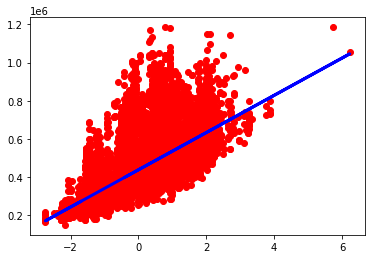

In [578]:
plt.scatter(X_validate, y_validate, color = 'red')
plt.plot(X_validate, reg.predict(X_validate), color='blue', linewidth = 3)
plt.show()

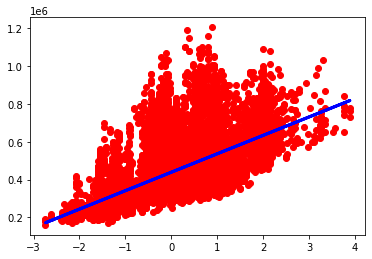

In [579]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, reg.predict(X_test), color='blue', linewidth = 3)
plt.show()

### 

### 3.1.2 Linear Model - 2 Features

In [530]:
X = df_encoded[['floor_area_sqm', 'remaining_lease_in_months']]
y = df_encoded['resale_price']

X_train, X_validate, X_test, y_train, y_validate, y_test = split_dataset(X, y)

In [531]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_validate, y_validate)

0.4456464568450438

In [532]:
reg.score(X_test, y_test)

0.4503587710335769

In [536]:
X_validate.shape

(15579, 2)

### 3.1.3 Linear Model - ALL Features

In [580]:
X = df_encoded.drop(['resale_price'], axis=1)
y = df_encoded['resale_price']

X_train, X_validate, X_test, y_train, y_validate, y_test = split_dataset(X, y)

In [581]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_validate, y_validate)

0.8630507202136727

In [582]:
reg.score(X_test, y_test)

0.8642315745874006

## 3.2 Ridge Model

### 3.2.1 Ridge Model - ALL Features

In [590]:
num_alpha = 7
alpha = np.zeros((num_alpha))
for i in range(num_alpha):
    alpha[i] = pow(10, i - 6)
    
ridge = [linear_model.Ridge(alpha = alpha[i], max_iter = 10000) for i in range(num_alpha)]

In [586]:
lasso_mse = np.zeros((num_alpha, 2))
lasso_cplxy = np.zeros((num_alpha))
import operator

for i in range(num_alpha):
    # build lasso regression models here
    reg = lasso[i]
    reg.fit(X_train, y_train)
    
    mse_train = metrics.mean_squared_error(reg.predict(X_train), y_train)
    lasso_mse[i,0] = mse_train
    
    mse_test = metrics.mean_squared_error(reg.predict(X_test), y_test)
    lasso_mse[i,1] = mse_test

    dictionary_lasso={}
    for l in  range(len(reg.coef_)) :
        dictionary_lasso[l]=abs(reg.coef_[l])
    sorted_lasso = sorted(dictionary_lasso.items(), key=operator.itemgetter(1),reverse=True)
    
    cplxy = LA.norm(reg.coef_, ord=1)
    lasso_cplxy[i] = cplxy
    
    print('-' * 32)
    print('lasso with alpha', alpha[i])
    print('-' * 32)
    print('MSE on training data:', mse_train)
    print('MSE on test data:', mse_test)
    print('model complexity:', cplxy)
    print('regularized cost:', mse_train + alpha[i] * cplxy)
    print('important attributes:',sorted_lasso[:2])
    break

--------------------------------
lasso with alpha 1e-06
--------------------------------
MSE on training data: 3198013312.500924
MSE on test data: 3166585341.286637
model complexity: 4390064.533052328
regularized cost: 3198013316.890989
important attributes: [(46, 297362.42205973546), (9, 289641.6366019774)]


/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49250700558834.47, tolerance: 110039440801.17258
  model = cd_fast.enet_coordinate_descent(


In [591]:
lasso_mse = np.zeros((num_alpha, 2))
lasso_cplxy = np.zeros((num_alpha))
import operator

for i in range(num_alpha):
    # build lasso regression models here
    reg = lasso[i]
    reg.fit(X_train, y_train)
    
    mse_train = metrics.mean_squared_error(reg.predict(X_train), y_train)
    lasso_mse[i,0] = mse_train
    
    mse_test = metrics.mean_squared_error(reg.predict(X_test), y_test)
    lasso_mse[i,1] = mse_test

    dictionary_lasso={}
    for l in  range(len(reg.coef_)) :
        dictionary_lasso[l]=abs(reg.coef_[l])
    sorted_lasso = sorted(dictionary_lasso.items(), key=operator.itemgetter(1),reverse=True)
    
    cplxy = LA.norm(reg.coef_, ord=1)
    lasso_cplxy[i] = cplxy
    
    print('-' * 32)
    print('lasso with alpha', alpha[i])
    print('-' * 32)
    print('MSE on training data:', mse_train)
    print('MSE on test data:', mse_test)
    print('r^2 on training data:', reg.score(X_validate, y_validate))
    print('r^2 on test data:', reg.score(X_test, y_test))
    print('model complexity:', cplxy)
    print('regularized cost:', mse_train + alpha[i] * cplxy)
    print('important attributes:',sorted_lasso[:2])

/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49250700558834.47, tolerance: 110039440801.17258
  model = cd_fast.enet_coordinate_descent(


--------------------------------
lasso with alpha 1e-06
--------------------------------
MSE on training data: 3198013312.500924
MSE on test data: 3166585341.286637
r^2 on training data: 0.8630507202173324
r^2 on test data: 0.8642315745794519
model complexity: 4390064.533052328
regularized cost: 3198013316.890989
important attributes: [(46, 297362.42205973546), (9, 289641.6366019774)]


/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49250702221023.56, tolerance: 110039440801.17258
  model = cd_fast.enet_coordinate_descent(


--------------------------------
lasso with alpha 1e-05
--------------------------------
MSE on training data: 3198013312.5009313
MSE on test data: 3166585342.9551363
r^2 on training data: 0.863050720250272
r^2 on test data: 0.8642315745079143
model complexity: 4390034.403774494
regularized cost: 3198013356.401275
important attributes: [(46, 297360.137584843), (9, 289640.4952707869)]


/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49250717479947.05, tolerance: 110039440801.17258
  model = cd_fast.enet_coordinate_descent(


--------------------------------
lasso with alpha 0.0001
--------------------------------
MSE on training data: 3198013312.5016723
MSE on test data: 3166585359.6405306
r^2 on training data: 0.8630507205795976
r^2 on test data: 0.8642315737925225
model complexity: 4389733.110997911
regularized cost: 3198013751.474983
important attributes: [(46, 297337.2928359387), (9, 289629.08195938345)]


/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49250869050285.64, tolerance: 110039440801.17258
  model = cd_fast.enet_coordinate_descent(


--------------------------------
lasso with alpha 0.001
--------------------------------
MSE on training data: 3198013312.575751
MSE on test data: 3166585526.533678
r^2 on training data: 0.8630507238663532
r^2 on test data: 0.8642315666369218
model complexity: 4386720.1832310315
regularized cost: 3198017699.295934
important attributes: [(46, 297108.8453467473), (9, 289514.94884549663)]


/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44925578731944.91, tolerance: 110039440801.17258
  model = cd_fast.enet_coordinate_descent(


--------------------------------
lasso with alpha 0.01
--------------------------------
MSE on training data: 3198013319.983891
MSE on test data: 3166587376.45876
r^2 on training data: 0.8630507548510761
r^2 on test data: 0.8642314873207537
model complexity: 4360836.725686597
regularized cost: 3198056928.3511477
important attributes: [(46, 295060.40227611084), (9, 288373.6401503877)]


/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29965355489371.336, tolerance: 110039440801.17258
  model = cd_fast.enet_coordinate_descent(


--------------------------------
lasso with alpha 0.1
--------------------------------
MSE on training data: 3198014064.247355
MSE on test data: 3166607668.9815936
r^2 on training data: 0.8630509467586153
r^2 on test data: 0.8642306172719232
model complexity: 4237937.515287888
regularized cost: 3198437857.9988837
important attributes: [(46, 281595.85378366866), (9, 280440.45103540004)]
--------------------------------
lasso with alpha 1.0
--------------------------------
MSE on training data: 3198088136.132999
MSE on test data: 3166780382.766137
r^2 on training data: 0.8630452734085243
r^2 on test data: 0.8642232121095641
model complexity: 4044757.253585841
regularized cost: 3202132893.3865848
important attributes: [(46, 253770.67266286386), (9, 248179.90337464187)]
